In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json 
import os
import cv2
from tqdm import tqdm

In [ ]:
measurement_dir = r'../../measurements/lab/knownID'
id_dirs = []
ids = []
verbose = False
for dir_name in os.listdir(measurement_dir):
    dir_path = os.path.join(measurement_dir, dir_name)
    if os.path.isdir(dir_path):
        if dir_name != 'inputIDcode': ## remove development folder
            id_dirs.append(dir_path)
            if verbose:
                print(dir_path)
            ids.append(dir_name)

In [10]:
data = {'id':[], 'measurement_day':[], 'morphometrics_path':[]}
verbose = False
for id_dir, id in zip(id_dirs, ids):
    if verbose:
        print(id)
    for day_name in os.listdir(id_dir):
        day_dir = os.path.join(id_dir, day_name)
        if os.path.isdir(day_dir) != True:
            continue
        if verbose:
            print('\t',dir_name)
        morphometrics_path = None
        for measurement_name in os.listdir(day_dir):
            measurement_dir = os.path.join(day_dir, measurement_name)
            if os.path.isdir(measurement_dir) != True:
                continue
            if verbose:
                print('\t\t', measurement_name)
            for file in os.listdir(measurement_dir):
                if verbose:
                    print('\t\t\t', file)
                if 'morphometrics.json' in file:
                    morphometrics_path = os.path.join(measurement_dir, file)
        if morphometrics_path != None:
            data['id'].append(id)
            data['measurement_day'].append(day_name)
            data['morphometrics_path'].append(morphometrics_path)
    
    

In [11]:
data = pd.DataFrame(data)
data

,id,measurement_day,morphometrics_path
0,Aster,01_26_2025,../../measurements/lab/knownID\Aster\01_26_202...
1,Aster,02_23_2025,../../measurements/lab/knownID\Aster\02_23_202...
2,Beryl,01_26_2025,../../measurements/lab/knownID\Beryl\01_26_202...
3,Beryl,02_23_2025,../../measurements/lab/knownID\Beryl\02_23_202...
4,Chrissy,01_26_2025,../../measurements/lab/knownID\Chrissy\01_26_2...
5,Chrissy,02_23_2025,../../measurements/lab/knownID\Chrissy\02_23_2...
6,Coraline,01_26_2025,../../measurements/lab/knownID\Coraline\01_26_...
7,Coraline,02_23_2025,../../measurements/lab/knownID\Coraline\02_23_...
8,Gen,01_26_2025,../../measurements/lab/knownID\Gen\01_26_2025\...
9,Ginro,01_26_2025,../../measurements/lab/knownID\Ginro\01_26_202...


In [12]:
from src.starMorphometricTool.utils.data_utils import (load_morphometrics, get_arm_lengths, calculate_arm_diameters)
from src.starMorphometricTool.utils.image_utils import normalize_corrected_objects

areas_mm2, minor_axes_mm, major_axes_mm = [], [], []
averages_arm_lengths, stds_arm_lengths = [], []
averages_diameters, stds_diameters = [], []
corrected_objects = []
morphometrics_list = [] 

for i, row in tqdm(data.iterrows()):
    morphometrics_path = row['morphometrics_path']
    morphometrics = load_morphometrics(morphometrics_path)
    morphometrics_list.append(morphometrics)
    
    area_mm2 = morphometrics['area_mm2']
    areas_mm2.append(area_mm2)
    length_minor_axis_mm = morphometrics['minor_axis_mm']
    minor_axes_mm.append(length_minor_axis_mm)
    length_major_axis_mm = morphometrics['major_axis_mm']
    major_axes_mm.append(length_major_axis_mm)
    
    arm_lengths = np.array(get_arm_lengths(morphometrics))
    arm_diameters = np.array(calculate_arm_diameters(morphometrics))
    
    average_arm_length = np.mean(arm_lengths)
    averages_arm_lengths.append(average_arm_length)
    std_arm_lengths = np.std(arm_lengths)
    stds_arm_lengths.append(std_arm_lengths)
    average_diameter = np.mean(arm_diameters)
    averages_diameters.append(average_diameter)
    std_diameter = np.std(arm_diameters)
    stds_diameters.append(std_diameter)
    
    path_corrected_object = os.path.join(os.path.dirname(morphometrics_path), 'corrected_object.png')
    corrected_object = cv2.imread(path_corrected_object)
    corrected_object = cv2.cvtColor(corrected_object, cv2.COLOR_BGR2RGB)
    corrected_objects.append(corrected_object)
    
normalized_objects = normalize_corrected_objects(corrected_objects, morphometrics_list)

data['areas_mm2'] = areas_mm2
data['length_minor_axis_mm'] = minor_axes_mm
data['length_major_axis_mm'] = major_axes_mm
data['average_arm_length_mm'] = averages_arm_lengths
data['std_arm_length_mm'] = stds_arm_lengths
data['average_diameter'] = averages_diameters
data['std_diameter'] = stds_diameters

46it [00:00, 1048.23it/s]


In [13]:
from src.starMorphometricTool.utils.date_utils import convert_to_datetime64
data['measurement_day'] = [convert_to_datetime64(date) for date in data['measurement_day']]
data

,id,measurement_day,morphometrics_path,areas_mm2,length_minor_axis_mm,length_major_axis_mm,average_arm_length_mm,std_arm_length_mm,average_diameter,std_diameter
0,Aster,2025-01-26,../../measurements/lab/knownID\Aster\01_26_202...,2339.107543,53.545020,64.760048,29.806158,5.624947,8.972576,2.766151
1,Aster,2025-02-23,../../measurements/lab/knownID\Aster\02_23_202...,2782.434733,54.367794,76.332960,35.365098,5.651767,8.681338,2.927734
2,Beryl,2025-01-26,../../measurements/lab/knownID\Beryl\01_26_202...,2671.707777,56.196180,72.292534,36.268142,3.589682,6.731867,1.872553
3,Beryl,2025-02-23,../../measurements/lab/knownID\Beryl\02_23_202...,2793.238927,57.459159,69.916100,34.976403,3.576491,6.738131,2.346149
4,Chrissy,2025-01-26,../../measurements/lab/knownID\Chrissy\01_26_2...,2367.056927,54.593813,65.355555,31.971656,4.461064,6.463602,1.833149
5,Chrissy,2025-02-23,../../measurements/lab/knownID\Chrissy\02_23_2...,2976.549927,58.963808,78.025765,37.229323,5.118489,7.033021,2.454416
6,Coraline,2025-01-26,../../measurements/lab/knownID\Coraline\01_26_...,2680.339747,63.583578,67.527251,36.134050,4.403585,8.484177,2.222861
7,Coraline,2025-02-23,../../measurements/lab/knownID\Coraline\02_23_...,3209.806149,67.393727,78.650075,40.307301,4.299838,9.651325,2.904765
8,Gen,2025-01-26,../../measurements/lab/knownID\Gen\01_26_2025\...,1107.866822,39.770494,44.151993,22.285347,1.962880,4.589441,2.109310
9,Ginro,2025-01-26,../../measurements/lab/knownID\Ginro\01_26_202...,1755.973249,45.668685,55.684001,28.251145,2.660887,6.436039,1.792419


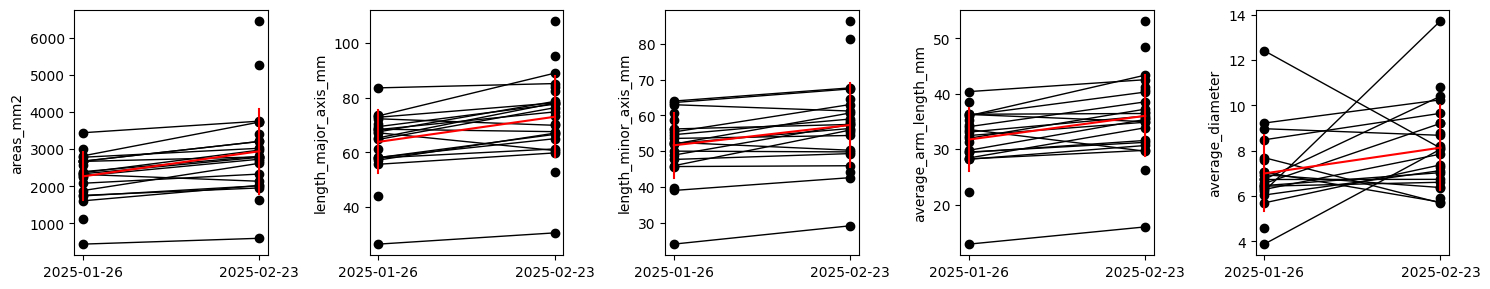

In [30]:
fig, axs = plt.subplots(1,5,figsize=(15,3))

def plot_morphometric_parameter_by_date (ax, data, feature):
    xticks = []
    unique_dates = sorted(data['measurement_day'].unique())
    mean_value, std_value = [], []
    for date in unique_dates:
        xticks.append(date)
        tmp = data[data['measurement_day'] == date]
        values = tmp[feature]
        mean_value.append(np.mean(values))
        std_value.append(np.std(values))
    for id in data['id'].unique():
        for date in unique_dates:
            tmp = data[(data['measurement_day'] == date) & (data['id'] == id)]
            if len(tmp) != 1:
                continue
            ax.scatter(date, tmp[feature], color='black')
        tmp = data[data['id'] == id]
        if len(tmp) > 1:
            ax.plot(tmp['measurement_day'], tmp[feature], color='black', linewidth=1)
    ax.set_xticks(xticks)
    ax.set_ylabel(feature)
    
    ax.plot(unique_dates, mean_value, color='red')
    for date, mean, std in zip(unique_dates, mean_value, std_value):
        ax.plot([date, date], [mean-std, mean+std], color='red')

plot_morphometric_parameter_by_date (axs[0], data, 'areas_mm2')
plot_morphometric_parameter_by_date (axs[1], data, 'length_major_axis_mm')
plot_morphometric_parameter_by_date (axs[2], data, 'length_minor_axis_mm')
plot_morphometric_parameter_by_date (axs[3], data, 'average_arm_length_mm')
plot_morphometric_parameter_by_date (axs[4], data, 'average_diameter')


fig.tight_layout()
plt.show()
        

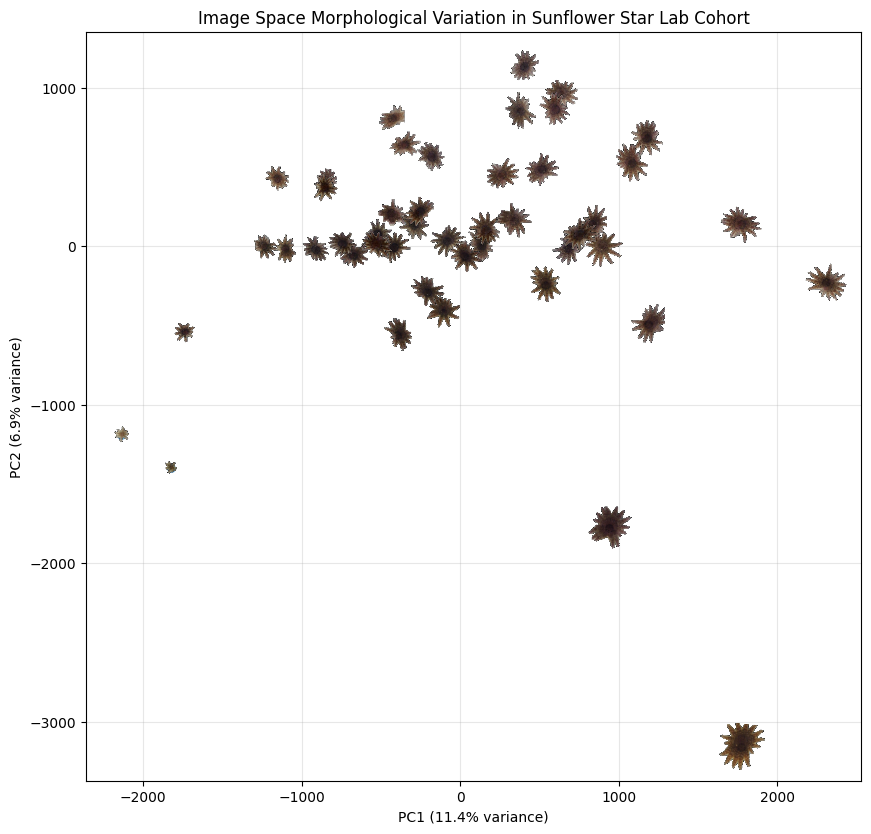

In [15]:
from src.starMorphometricTool.utils.visualization_utils import visualize_pca_with_images

fig, ax, X_pca, pca = visualize_pca_with_images(
    normalized_objects,
    max_thumbnails=50,    # Show 20 images
    max_image_size=0.2,  # Thumbnails take up 3% of plot area max
    fig_size=(10,10),    # Figure dimensions
    alpha=0.9,            # Transparency
    marker_size=30,        # Size of the scatter points,
    min_dist_factor=0.02,
    title="Image Space Morphological Variation in Sunflower Star Lab Cohort"
)


Explained variance by principal components:
PC1: 69.08%
PC2: 17.72%

Component loadings:
                            PC1       PC2
areas_mm2              0.440582 -0.062697
length_minor_axis_mm   0.430059 -0.166918
length_major_axis_mm   0.445286 -0.074859
average_arm_length_mm  0.442670 -0.100023
std_arm_length_mm      0.376421 -0.189195
average_diameter       0.258958  0.554889
std_diameter           0.133974  0.780322


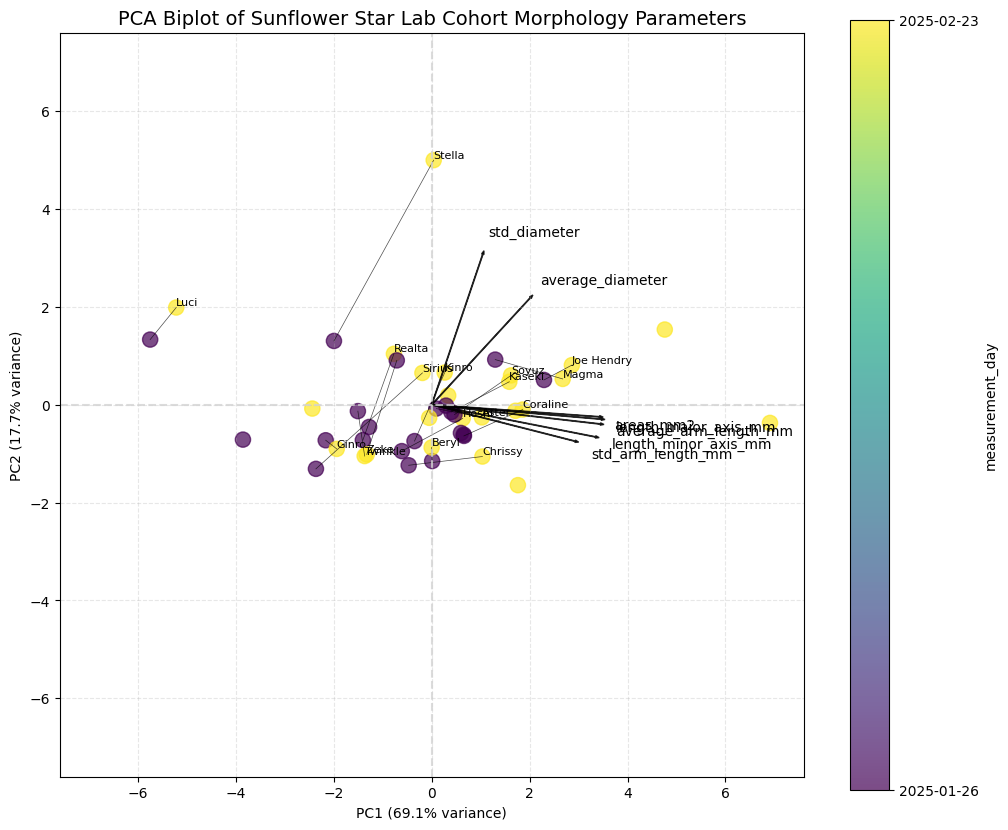

In [23]:
from src.starMorphometricTool.utils.morphology_pca import (compute_morphology_pca, create_pca_biplot)

# Select the features you want to include in the PCA
features = ['areas_mm2', 'length_minor_axis_mm', 'length_major_axis_mm', 
           'average_arm_length_mm', 'std_arm_length_mm', 
           'average_diameter', 'std_diameter']
# Compute the PCA
pca_df, pca_model, scaler, feature_names = compute_morphology_pca(data, columns=features)

# Create the biplot
fig, ax = create_pca_biplot(
    pca_df=pca_df,
    pca_model=pca_model,
    feature_names=feature_names,
    color_by='measurement_day',
    connect_by='id',              # Connect points with the same ID (was marker_by)
    title="PCA Biplot of Sunflower Star Lab Cohort Morphology Parameters",
    scaling=0.5,                  # Scale the arrows
    arrow_scale=7,                # Further scale up arrows
    arrow_color='black',          # All arrows are black
    marker_size=120,              # Larger markers
    line_color='black',           # Color for connecting lines
    line_width=0.5                # Thin lines connecting points
)